In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all_infos_processed.csv")

# Drop Unnamed columns from the dataframe
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 0.1", axis=1, inplace=True)

#Drop rows with at least one NaN values
#df.dropna(axis=0, inplace=True)

#Fill all NaN with 0
#df = df.fillna(0)

#Fill specific columns NaNs with 0
df["Terrace"].fillna(value=0, inplace=True)
df["Terrace_Area"].fillna(value=0, inplace=True)
df["Garden"].fillna(value=0, inplace=True)
df["Garden_Area"].fillna(value=0, inplace=True)

#Convert bool type colums to 0 and 1
df = df.replace({"Furnished": {False: 0, True: 1}})
df = df.replace({"Open_fire": {False: 0, True: 1}})
df = df.replace({"Terrace": {False: 0, True: 1}})
df = df.replace({"Garden": {False: 0, True: 1}})
df = df.replace({"Swimming_pool": {False: 0, True: 1}})
    
#Add two columns with the calculated price/m2 for living area alone and the whole surface area of the plot of land
df["price_living_sqm2"] = df["Price"] / df["Living_Area"]
df["price_plot_sqm2"] = df["Price"] / df["Surface_area_of_the_plot_of_land"]

df

,Locality,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,price_living_sqm2,price_plot_sqm2
0,1130,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,0.0,0,1,43.0,0,0.0,NaN,4.0,NaN,NaN,2884.615385,NaN
1,1140,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,0.0,0,1,43.0,0,0.0,NaN,4.0,NaN,NaN,2884.615385,NaN
2,1140,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,0.0,0,1,43.0,0,0.0,NaN,4.0,NaN,NaN,2884.615385,NaN
3,1180,APARTMENT,APARTMENT,485000.0,residential_sale,2.0,107.0,USA_HYPER_EQUIPPED,0.0,0,1,17.0,0,0.0,NaN,NaN,0.0,AS_NEW,4532.710280,NaN
4,1000,APARTMENT,DUPLEX,460000.0,residential_sale,3.0,147.0,USA_HYPER_EQUIPPED,0.0,0,1,52.0,0,0.0,NaN,2.0,NaN,NaN,3129.251701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,1150,HOUSE,VILLA,1450000.0,residential_sale,5.0,460.0,NaN,0.0,0,1,55.0,1,300.0,792.0,4.0,0.0,GOOD,3152.173913,1830.808081
19368,7000,HOUSE,VILLA,1495000.0,residential_sale,7.0,500.0,HYPER_EQUIPPED,0.0,1,1,200.0,1,10200.0,10550.0,4.0,1.0,AS_NEW,2990.000000,141.706161
19369,8480,HOUSE,VILLA,1595000.0,residential_sale,4.0,537.0,INSTALLED,0.0,0,1,0.0,1,0.0,14376.0,4.0,0.0,GOOD,2970.204842,110.948804
19370,1640,HOUSE,VILLA,1735000.0,residential_sale,6.0,450.0,INSTALLED,0.0,1,1,30.0,0,0.0,2285.0,4.0,NaN,GOOD,3855.555556,759.299781


In [11]:
df["Price"].describe()

count    1.821800e+04
mean     4.656113e+05
std      5.285788e+05
min      1.435000e+03
25%      2.290000e+05
50%      3.250000e+05
75%      4.950000e+05
max      1.100000e+07
Name: Price, dtype: float64

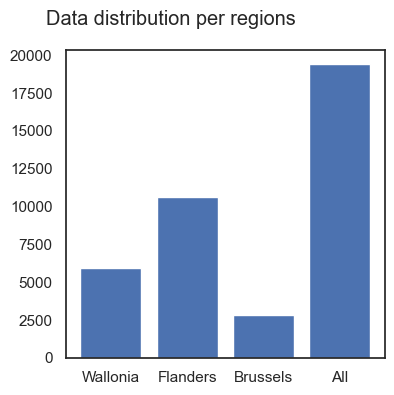

In [12]:
#Making masks based on zipcode ranges and applying them to separate variable
mask_wallonia = (df['Locality'] >= 1300) & (df['Locality'] < 1500) | (df['Locality'] >= 4000) & (df['Locality'] < 8000)
df_wallonia = df[mask_wallonia]
mask_flanders = (df['Locality'] >= 1500) & (df['Locality'] < 4000) | (df['Locality'] >= 8000) & (df['Locality'] < 10000)
df_flanders = df[mask_flanders]
mask_brussels = (df['Locality'] <  1300)
df_brussels = df[mask_brussels]

names = ["Wallonia", "Flanders", "Brussels", "All"]
values = [len(df_wallonia), len(df_flanders), len(df_brussels), len(df)]

plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.bar(names, values)
plt.suptitle("Data distribution per regions", x=0.2)
plt.savefig("./visuals/data_distribution_per_region.png", bbox_inches="tight")
plt.show()

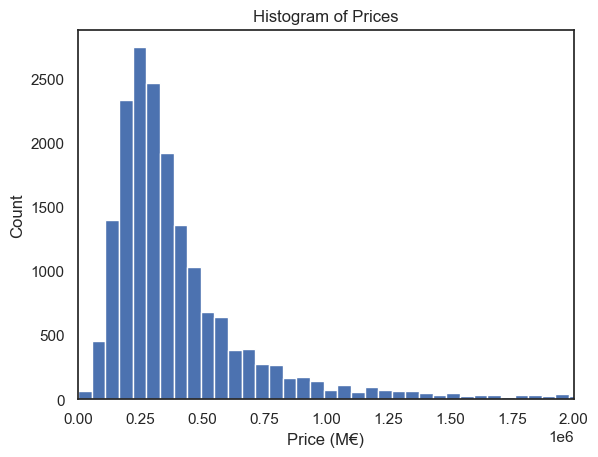

In [13]:
# Plot histogram of prices
plt.hist(df["Price"], bins=200)

# Add Price limit to filter outliers
plt.xlim(0, 2000000)

# Add labels and title
plt.xlabel("Price (M€)")
plt.ylabel("Count")
plt.title("Histogram of Prices")

plt.savefig("./visuals/Price_histogram.png", bbox_inches="tight")
plt.show()

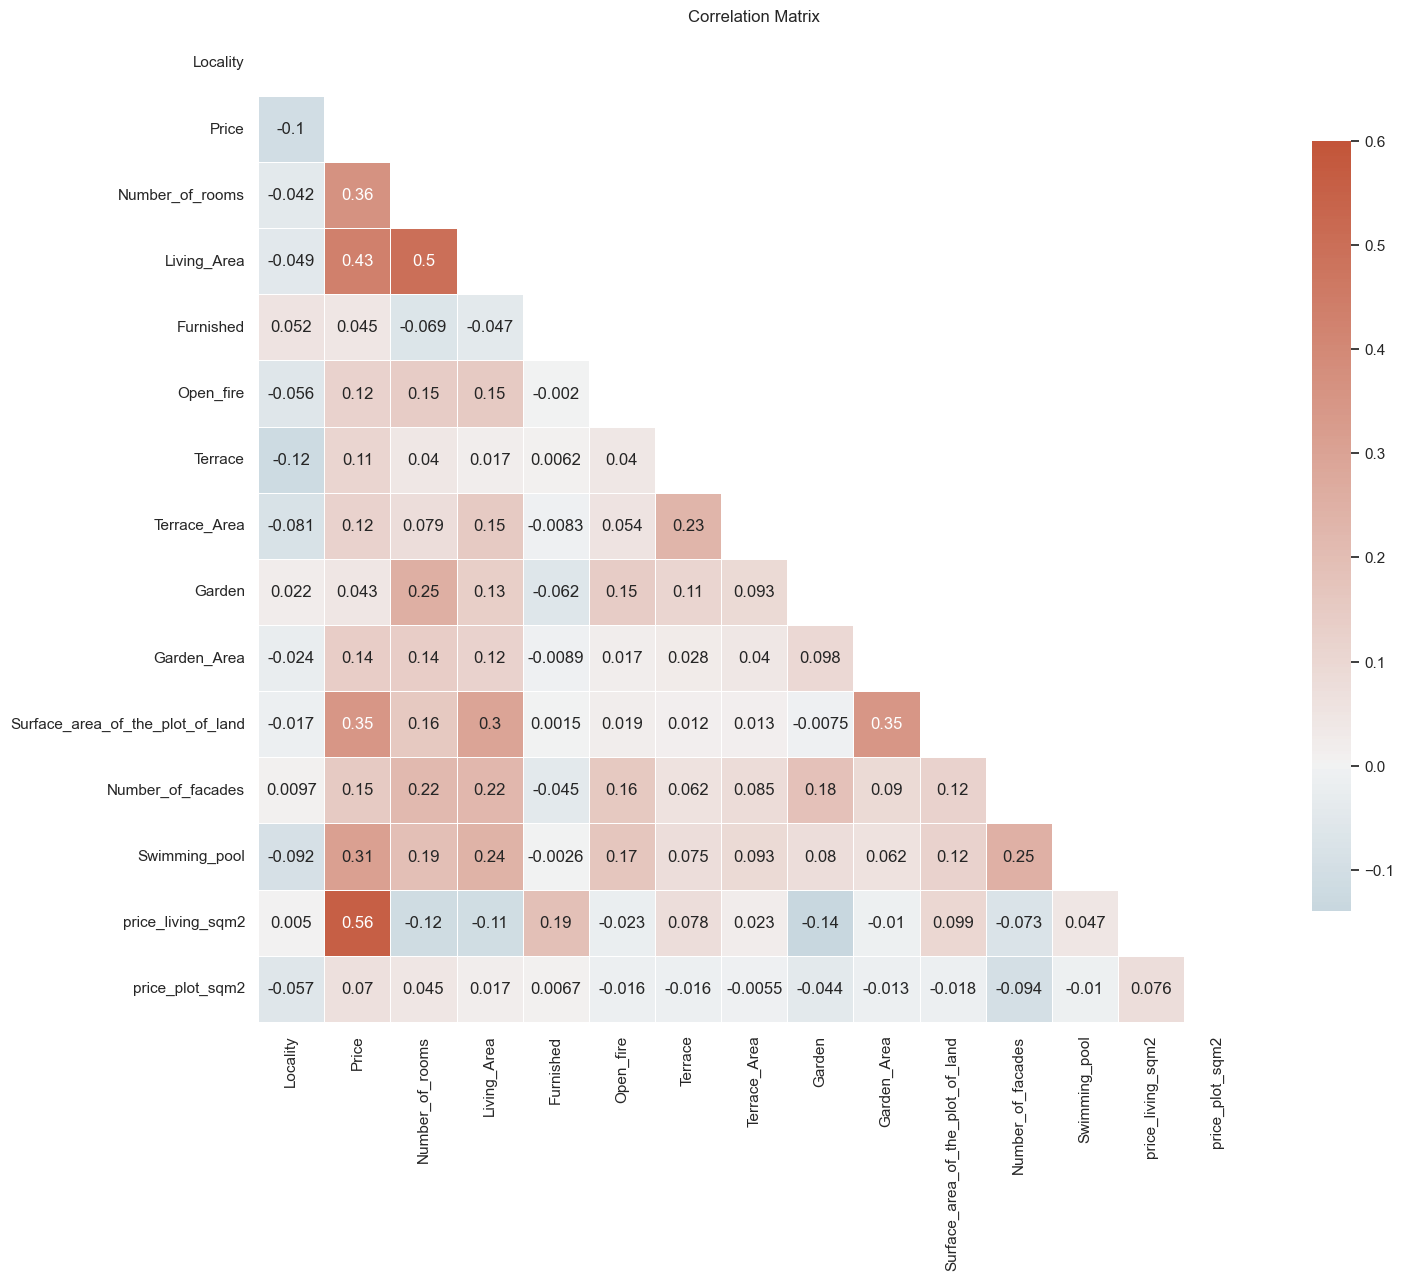

In [14]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")

plt.savefig("./visuals/Correlation_matrix.png", bbox_inches="tight")
plt.show()

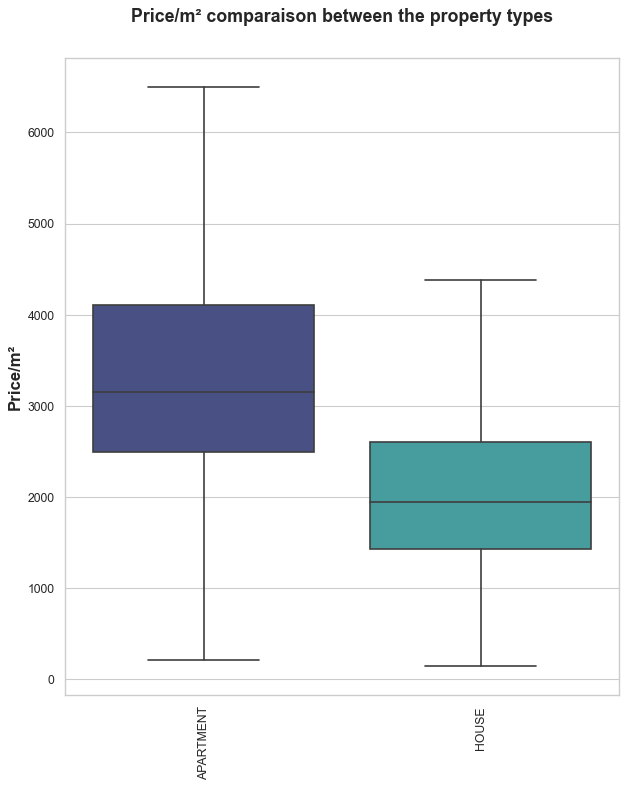

In [15]:
# Use boolean indexing and the ~ (not) operator to drop rows that contain the strings "HOUSE_GROUP" or "APARTMENT_GROUP" in the "Type_of_property" column
df = df[~df["Type_of_property"].isin(["HOUSE_GROUP", "APARTMENT_GROUP"])]

#Plot the graph
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, figsize=(8, 10), dpi=80)
box_plot = sns.boxplot(x = "Type_of_property",y = "price_living_sqm2",data = df, showfliers=False, palette="mako")
plt.ylabel("Price/m²", fontsize=15, fontweight="bold")
plt.xlabel("")
ax = box_plot.axes
ax.text(x=0.5, y=1.05, s="Price/m² comparaison between the property types", fontsize=16, weight="bold", ha="center", va="bottom", transform=ax.transAxes)
ax.tick_params(axis="x", rotation=90)
ax.grid(axis="y", linestyle="-", alpha=1) 
plt.savefig("./visuals/Price_per_living_sqm2_comparaison_between_property_types.png", bbox_inches="tight")
box_plot.figure.tight_layout()

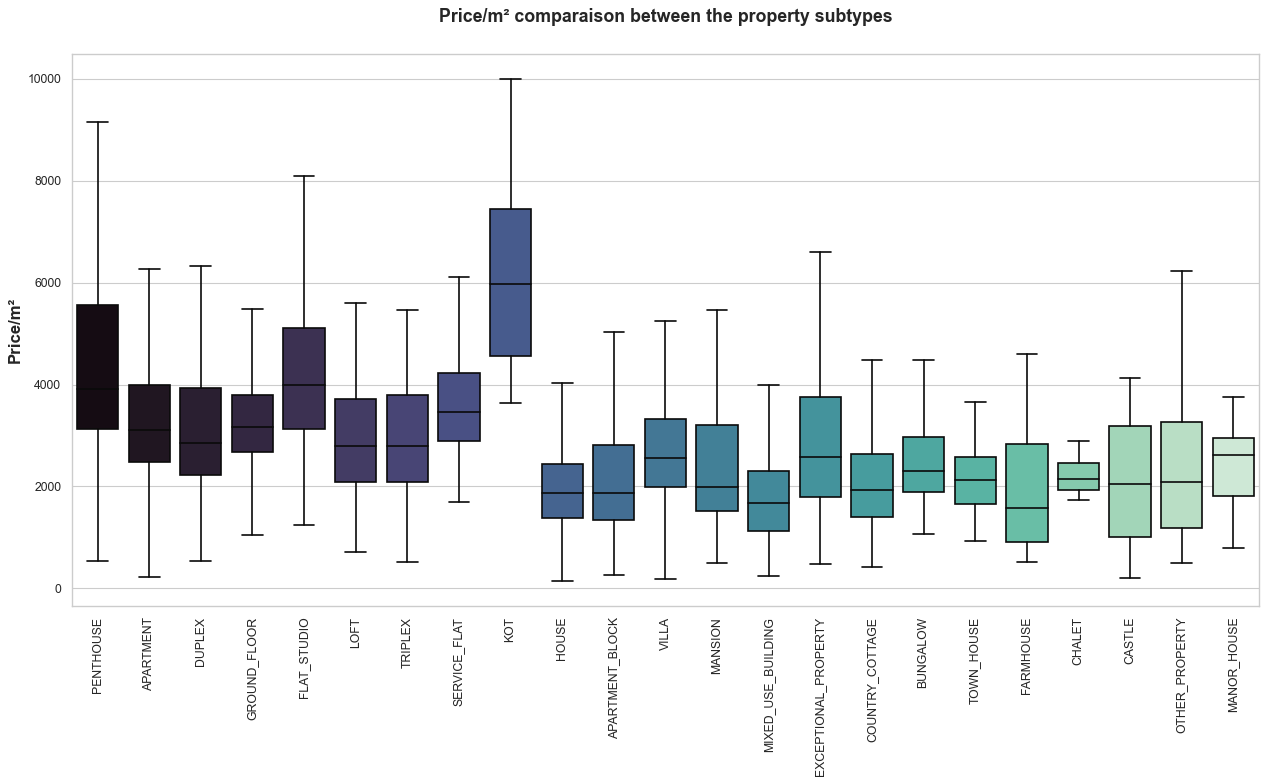

In [16]:
# Use boolean indexing and the ~ (not) operator to drop rows that contain the strings "house_group" or "appartment_group" in the "type_of_property" column
df = df[~df["Subtype_of_property"].isin(["HOUSE_GROUP", "APARTMENT_GROUP"])]

#Plot the graph
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, figsize=(16, 10), dpi=80)
box_plot = sns.boxplot(x = "Subtype_of_property",y = "price_living_sqm2",data = df, showfliers=False, palette="mako")
plt.ylabel("Price/m²", fontsize=15, fontweight="bold")
plt.xlabel("")
ax = box_plot.axes
ax.text(x=0.5, y=1.05, s="Price/m² comparaison between the property subtypes", fontsize=16, weight="bold", ha="center", va="bottom", transform=ax.transAxes)
ax.tick_params(axis="x", rotation=90)
ax.grid(axis="y", linestyle="-", alpha=1) 
plt.savefig("./visuals/Price_per_living_sqm2_comparaison_between_property_subtypes.png", bbox_inches="tight")
box_plot.figure.tight_layout()

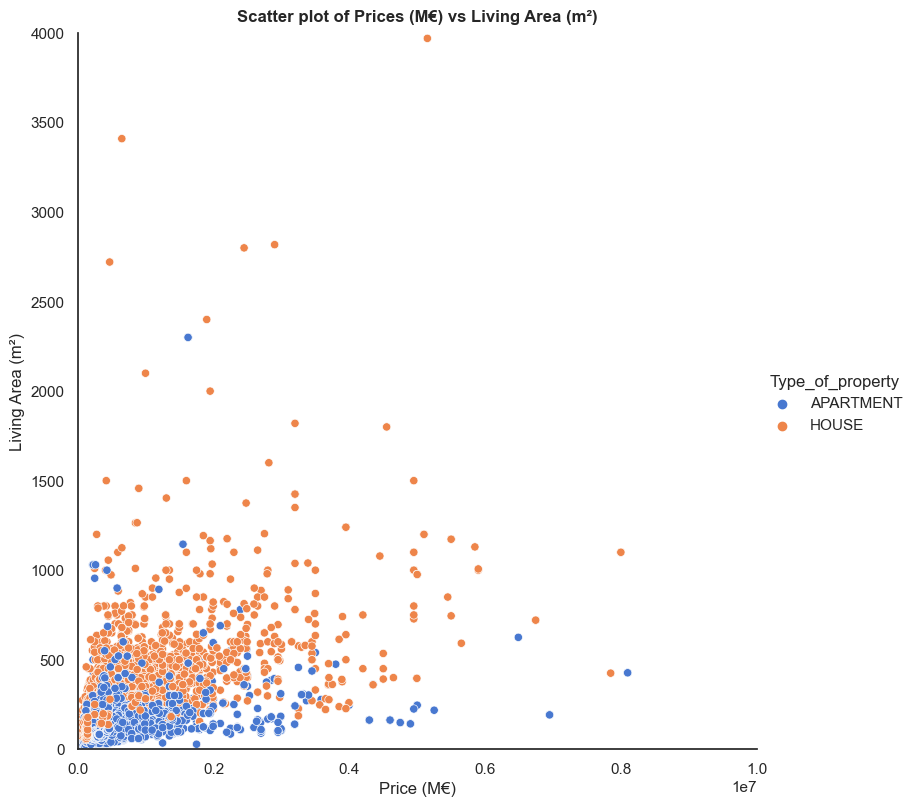

In [17]:
#Scatter plot of Price vs Living_Area
sns.set_theme(style="white")
sns.relplot(data=df, x="Price", y="Living_Area", hue="Type_of_property", palette="muted", height=8)
plt.xlim(0, 10000000)
plt.ylim(0, 4000)
plt.title("Scatter plot of Prices (M€) vs Living Area (m²)", fontsize=12, weight="bold", ha="center", va="bottom")
plt.xlabel("Price (M€)")
plt.ylabel("Living Area (m²)")
plt.savefig("./visuals/Price_vs_LivingArea_scatterplot.png", bbox_inches="tight")
plt.show()